### Test Vae class

In [1]:
import torch
from NewYggDrasill.core.models.models.noise_predictor import ModelKey

model_key = ModelKey(
    model_path = "GrafikXxxxxxxYyyyyyyyyyy/sdxl_Juggernaut",
    model_type = "sdxl",
    device = "mps",
    dtype = torch.float16,
)

/Users/honeysuckle/dev/Onmoon/MetaMirror/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from NewYggDrasill.core.models.vae_model import VaeModel

vae = VaeModel(**model_key)

VAE model has successfully loaded from 'GrafikXxxxxxxYyyyyyyyyyy/sdxl_Juggernaut' checkpoint!


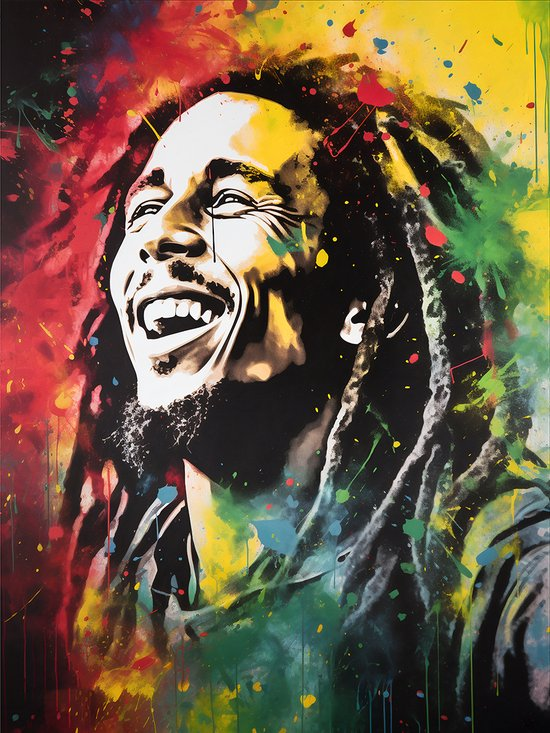

In [3]:
import torch
import matplotlib.pyplot as plt
from diffusers.utils import load_image

image = load_image("https://media.s-bol.com/3pP6QKrPl9XO/J0zBky/550x733.jpg")
image

In [4]:
from NewYggDrasill.core.pipelines.vae_pipeline import VaePipeline, VaePipelineInput

input = VaePipelineInput(
    width=None,
    height=None,
    image=image,
    mask_image=None,
)

vae_pipeline = VaePipeline()

In [5]:
vae_output = vae_pipeline(
    input,
    vae=vae,
)

VaePipelineInput(width=None, height=None, image=<PIL.Image.Image image mode=RGB size=550x733 at 0x28BAA7F90>, latents=None, generator=None, mask_image=None)


In [7]:
from NewYggDrasill.core.pipelines.vae_pipeline import VaePipeline, VaePipelineInput

input = VaePipelineInput(
    width=None,
    height=None,
    latents=vae_output.image_latents,
    mask_image=None,
)

vae_pipeline = VaePipeline()

In [9]:
vae_pipeline(
    input,
    vae=vae,
).images.shape

VaePipelineInput(width=None, height=None, image=None, latents=tensor([[[[-1.4238, -1.2188, -1.4180,  ..., -0.4919, -0.0494, -0.4358],
          [-1.5908, -1.3115, -1.7139,  ..., -0.6504, -0.0194, -0.5781],
          [-0.9365, -1.3086, -1.9727,  ..., -0.5332,  0.4207, -0.1433],
          ...,
          [-1.1064, -1.0156, -0.4563,  ..., -1.5713, -1.8721, -1.9229],
          [-1.3623, -0.3562, -2.0449,  ..., -1.1729, -2.1465, -1.9414],
          [-1.1113, -1.9365, -1.3164,  ..., -1.8428, -1.4912, -1.6025]],

         [[-0.0820,  0.9072,  0.4258,  ..., -0.7490,  0.0563,  0.1164],
          [ 0.2617,  0.6152,  0.1144,  ..., -0.1818,  0.2754, -0.5601],
          [ 0.9341,  0.9844, -0.0702,  ..., -0.8027,  0.3127, -0.3406],
          ...,
          [ 0.9473, -0.4673,  0.9106,  ...,  0.6196, -0.2451,  0.2375],
          [ 0.2900,  1.2686, -0.2708,  ...,  0.9004,  0.3794,  0.5854],
          [ 0.3481, -0.5576,  0.0371,  ...,  0.0545,  0.8604,  0.0694]],

         [[-1.0635, -0.4338, -0.9673,  .

RuntimeError: MPS backend out of memory (MPS allocated: 8.50 GB, other allocations: 414.14 MB, max allowed: 9.07 GB). Tried to allocate 386.75 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).